# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL (from Class 2 Activity 3)
url = f"https://api.openweathermap.org/data/2.5/weather?"
response = requests.get(url)
#print(response)

In [4]:
# Build query url (from Class 2 Activity 3)
query_url = url + "appid = " + weather_api_key + "&q = " + city
print(query_url)

https://api.openweathermap.org/data/2.5/weather?appid = d8f76738a9441f2a246a8ebf934514e7&q = port moresby


In [5]:
# Class 3 Activity 05

# Set the API base URL
def get_weather_data(city_url):
    return requests.get(city_url).json()

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #(Class 2 Activities 4 & 5)
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = get_weather_data(city_url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]

        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({#"City_ID": city_ID, 
                          "City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thoen
Processing Record 2 of Set 1 | manhattan
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | shizuishan
Processing Record 7 of Set 1 | at taj
Processing Record 8 of Set 1 | piti village
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | bhitarwar
Processing Record 15 of Set 1 | bac lieu
Processing Record 16 of Set 1 | zinjibar
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | santana
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | pudasjarvi
Processing Record 22 of Set 1 | pandan
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thoen,17.6129,99.2161,23.68,98,94,0.40,TH,1699057639
1,manhattan,40.7834,-73.9662,12.56,60,0,5.14,US,1699057640
2,inhambane,-23.8650,35.3833,20.66,65,90,3.69,MZ,1699057642
3,nova sintra,14.8667,-24.7167,24.06,77,30,9.44,CV,1699057643
4,port-aux-francais,-49.3500,70.2167,2.41,65,71,13.31,TF,1699057644


In [8]:
# Export the City_Data into a csv (Class 3 Activity 05)
city_data_df.to_csv("output_data\cities.csv", index=False)

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thoen,17.6129,99.2161,23.68,98,94,0.40,TH,1699057639
1,manhattan,40.7834,-73.9662,12.56,60,0,5.14,US,1699057640
2,inhambane,-23.8650,35.3833,20.66,65,90,3.69,MZ,1699057642
3,nova sintra,14.8667,-24.7167,24.06,77,30,9.44,CV,1699057643
4,port-aux-francais,-49.3500,70.2167,2.41,65,71,13.31,TF,1699057644


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
#Print the exact column names in the DataFrame
print(city_data_df.columns.tolist(), end=' ')

['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'] 

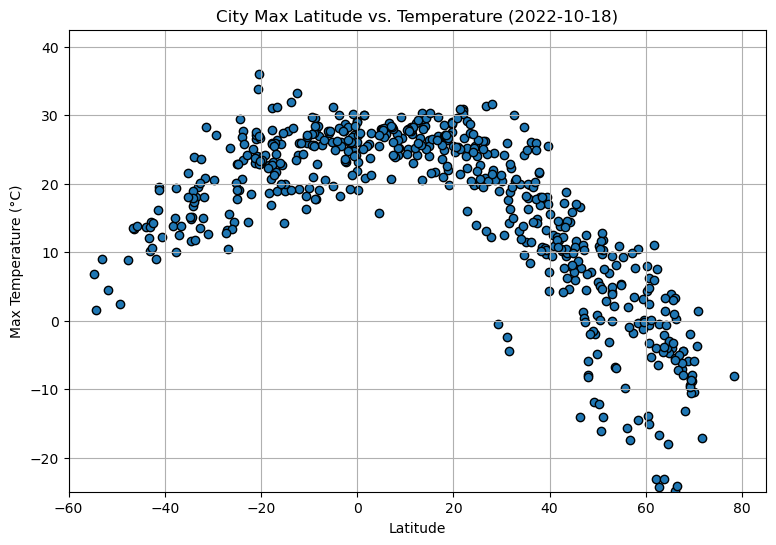

In [11]:
# Class 2 Activity 05

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors= "black")

# Incorporate the other graph properties
#----------------------------------------

# Set x-axis range from -60 to 85 and y-axis range from -25 to 42.5
plt.xlim(-60, 85)  
plt.ylim(-25, 42.5) 

# Add labels and title
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

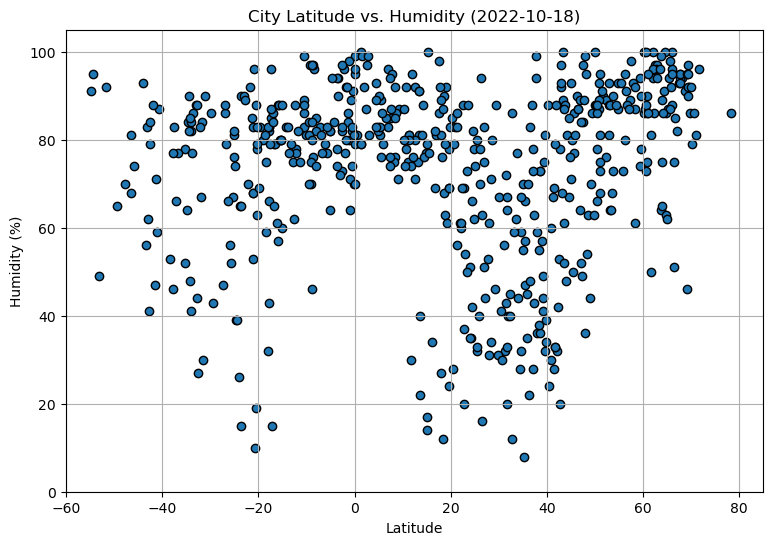

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors= "black")

# Incorporate the other graph properties
#----------------------------------------

# Set x-axis range from -60 to 85 and y-axis range from 0 to 105
plt.xlim(-60, 85)  
plt.ylim(0, 105) 

# Add labels and title
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

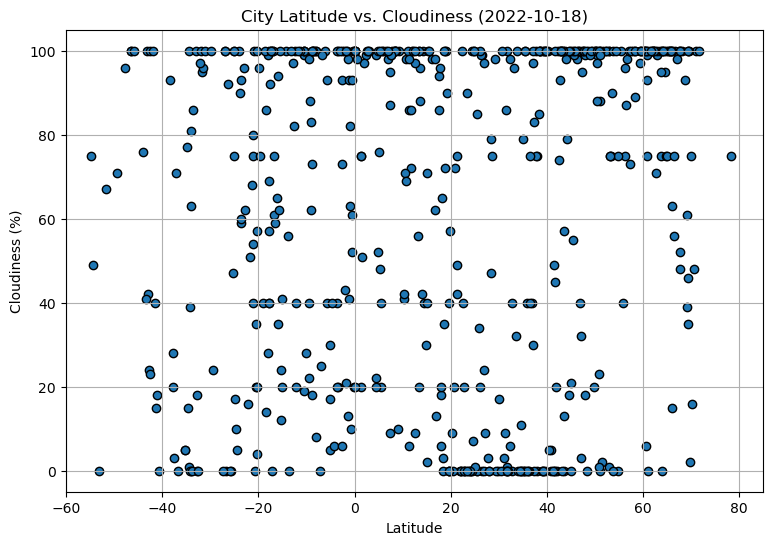

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors= "black")

# Incorporate the other graph properties
#----------------------------------------

# Set x-axis range from -60 to 85 and y-axis range from -5 to 105
plt.xlim(-60, 85)  
plt.ylim(-5, 105) 

# Add labels and title
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

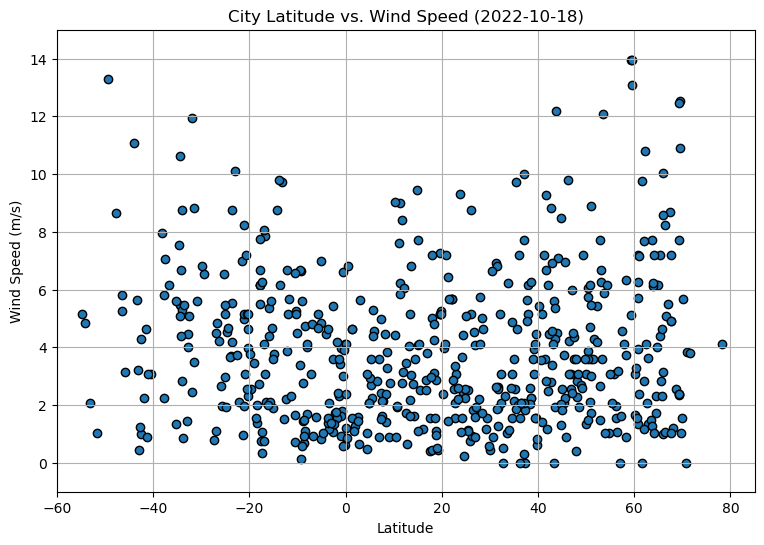

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors= "black")

# Incorporate the other graph properties
#----------------------------------------

# Set x-axis range from -60 to 85 and y-axis range from -1 to 15
plt.xlim(-60, 85)  
plt.ylim(-1, 15) 

# Add labels and title
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Class 2 Activity 07

    # Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #print(line_eq)

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    # plt.annotate(text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thoen,17.6129,99.2161,23.68,98,94,0.40,TH,1699057639
1,manhattan,40.7834,-73.9662,12.56,60,0,5.14,US,1699057640
3,nova sintra,14.8667,-24.7167,24.06,77,30,9.44,CV,1699057643
5,shizuishan,39.2333,106.7694,9.79,44,100,3.94,CN,1699057646
6,at taj,24.2049,23.2857,19.78,35,0,3.66,LY,1699057647


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,inhambane,-23.8650,35.3833,20.66,65,90,3.69,MZ,1699057642
4,port-aux-francais,-49.3500,70.2167,2.41,65,71,13.31,TF,1699057644
9,invercargill,-46.4000,168.3500,13.34,81,100,5.81,NZ,1699057652
10,ushuaia,-54.8000,-68.3000,6.81,91,75,5.14,AR,1699057653
11,waitangi,-43.9535,-176.5597,13.69,93,76,11.06,NZ,1699057655


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7418385760864274


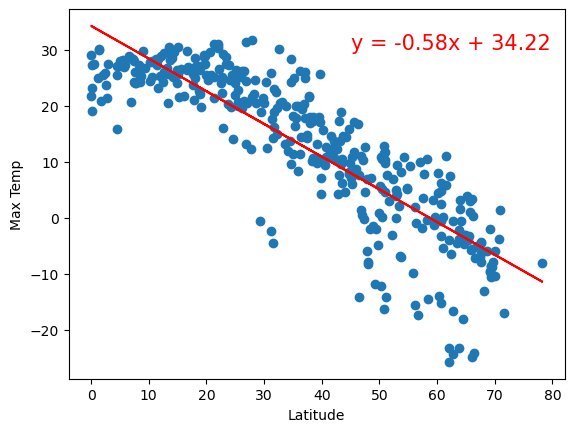

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (45, 30))

The r-value is: 0.5181619771464621


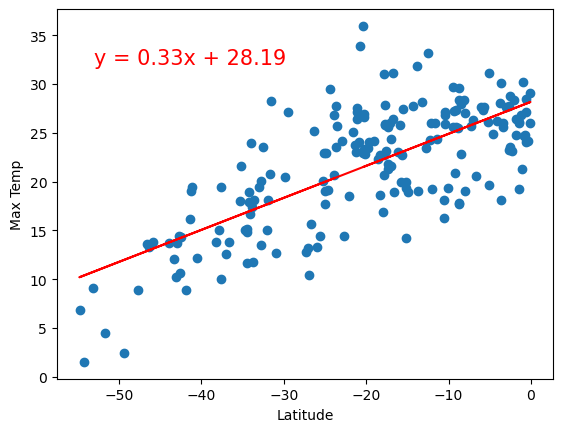

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (-53, 32))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

An R-value of 1 indicates a perfect positive linear relationship, while an R-value of -1 indicates a perfect negative linear relationship. An R-value of 0 suggests no linear relationship. 

There is an inverse correlation between the latitudes and the temperatures.

In Temperature vs. Latitude Linear Regression Plots on the Northern Hemisphere and the Southern Hemisphere, the two r-values of 0.7418385760864274 & 0.5181619771464621 respectively indicate a moderately strong positive linear relationship between the "x" and "y" variables i.e. between the Latitude and the Temperature.

The two linear regression equations describe how "y" (Temperature) changes with changes in "x" (Latitude).  This means that the lines are reasonably good fits for the data, and can be used to make predictions about "y" (Temperature) based on the values of "x" (Latitude).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02825154105884831


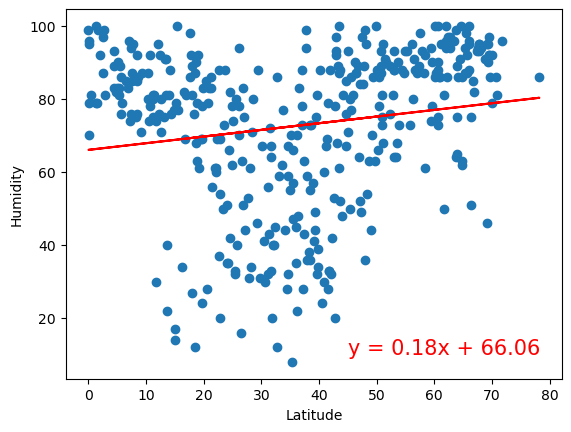

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,10))

The r-value is: 0.057362528661052216


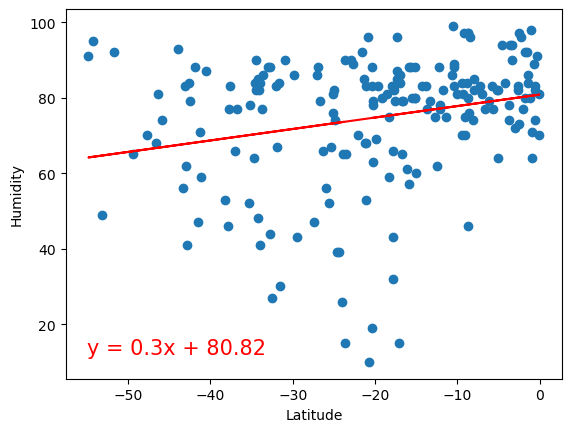

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (-55,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Humidity vs. Latitude Linear Regression Plots on the Northern Hemisphere and the Southern Hemisphere, the two r-values of 0.02825154105884831 & 0.057362528661052216 respectively indicate very weak linear relationships between the "x" and "y" variables i.e. between the Latitude and the Humidity.

The two low r-values suggest that the data points are not well explained by the linear models. This suggests that these two  linear models are not good fits for the data, and may not be very useful for making predictions about Humidity based on the values of the Temperatures.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02596306246371301


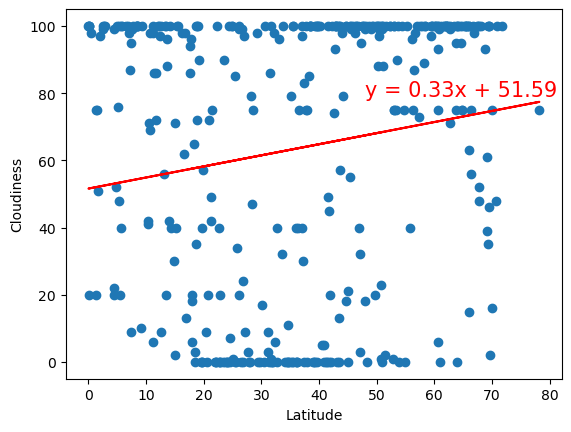

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (48,79))

The r-value is: 0.014027567648827993


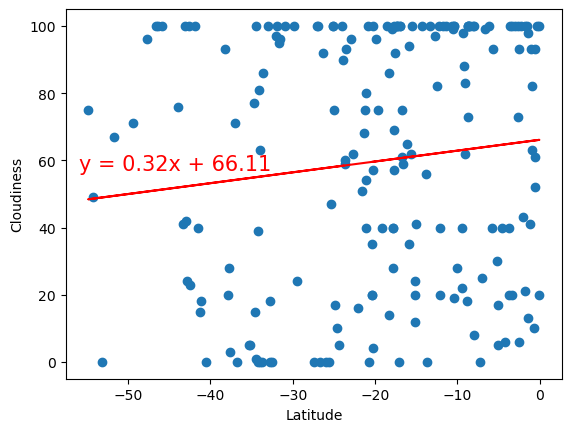

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (-56,57))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

From the plots on the two graphs above, we can determine that there is no correlation between cloudiness levels and the latitudes.

In the two Cloudiness vs. Latitude Linear Regression Plots, the two linear regression equations of y = 0.33x + 51.59 & y = 0.32x + 66.11 describe how "y" (Cloudiness) changes with changes in "x" (Latitude) but the r-values of 0.02596306246371301 and 0.014027567648827993 indicate very weak linear relationships between the two variables. 

This suggests that the linear model is not a good fit for the data, and it may not be very useful for making predictions about "y"(Cloudiness) based on the values of "x" (Latitude).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03947205138213818


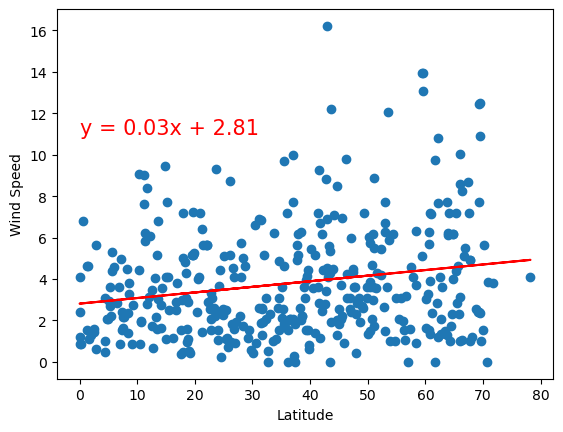

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,11))

The r-value is: 0.07706443649353777


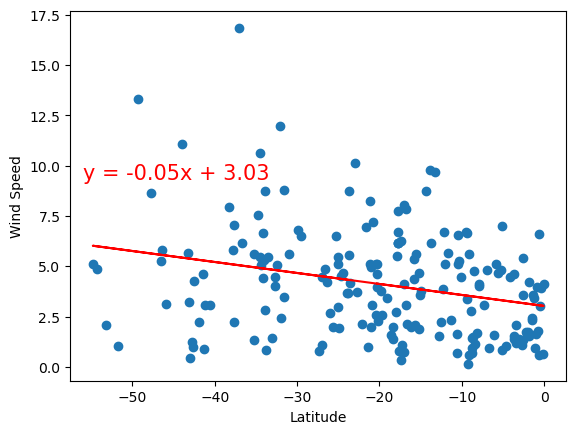

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (-56,9.3))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The two scatter plots above for Wind Speed vs. Latitude show that there is no correlation between Wind Speeds and Latitudes.

R-values of 0.03947205138213818 and 0.07706443649353777 indicate very weak linear relationships between "x" (Latitude) and "y" (Wind Speed).

The coefficients of "0.03" and "-0.05" (the slopes) are very small rates of changes in "y" (Wind Speed) with respect to changes in "x" (Latitude).